In [937]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")
 

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [938]:
train=pd.read_csv(r"C:\Users\ROHEN\OneDrive\Desktop\documents\AI\Assignment\train (2).csv")

In [939]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [940]:
train.shape

(8523, 12)

In [941]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [942]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [943]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [944]:
[features for features in train.columns if train[features].isnull().sum()>0]

['Item_Weight', 'Outlet_Size']

In [945]:
(train.isna().sum()/train.shape[0])*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [946]:
trainNullper=train.apply(lambda x : np.round( x.isnull().sum()/train.shape[0],4))*100   #round the value to 4 numbers
trainNulcount=train.isnull().sum()  
trainNullDF=pd.DataFrame([trainNulcount,trainNullper]).T   #T stands for transpose
trainNullDF.columns=["Nullcount","Nullpercentage"]   #columns to give new name to columns
trainNullDF.sort_values(by="Nullcount",ascending=False,inplace=True)  


In [947]:
trainNullDF.reset_index(inplace=True)
trainNullDF.head(20)

,index,Nullcount,Nullpercentage
0,Outlet_Size,2410.0,28.28
1,Item_Weight,1463.0,17.17
2,Item_Identifier,0.0,0.00
3,Item_Fat_Content,0.0,0.00
4,Item_Visibility,0.0,0.00
5,Item_Type,0.0,0.00
6,Item_MRP,0.0,0.00
7,Outlet_Identifier,0.0,0.00
8,Outlet_Establishment_Year,0.0,0.00
9,Outlet_Location_Type,0.0,0.00


In [948]:
nullcolumns=np.array(trainNullDF[:2]["index"])  
nullcolumns

array(['Outlet_Size', 'Item_Weight'], dtype=object)

In [949]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [950]:
for i in nullcolumns:
    if train[i].dtype == "object":
        print(i,"is an object type")
        train[i].fillna(train[i].mode()[0],inplace=True)
    else:
        print(f"{i} is numerical")
        train[i].fillna(train[i].median(),inplace=True)


Outlet_Size is an object type
Item_Weight is numerical


In [951]:
train.isna().sum()   #Null values treated


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [952]:
numerical_columns = train.select_dtypes(include=np.number).columns
numerical_columns=numerical_columns.drop(['Item_Outlet_Sales'])

In [953]:
object_columns = train.select_dtypes(include=np.object).columns
object_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

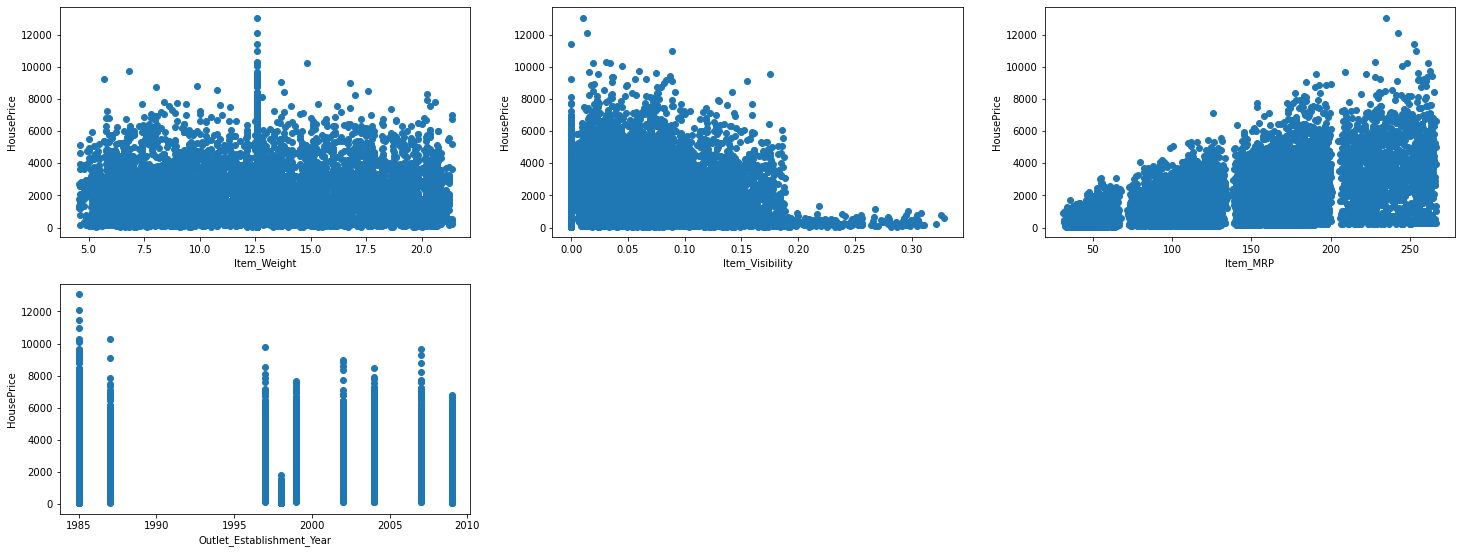

In [954]:
j=0
plt.figure(figsize=(25,50))
for column in numerical_columns:
    plt.subplot(10,3,j+1)
    plt.scatter(train[column],train["Item_Outlet_Sales"])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j=j+1

In [955]:
train["Item_Outlet_Sales"].nunique()

3493

In [956]:
discriatecols=[]
continuescols=[]
for columns in numerical_columns:
    if train[columns].nunique()>=20:
        continuescols.append(columns)
    else:
        discriatecols.append(columns)

In [957]:
discriatecols

['Outlet_Establishment_Year']

In [958]:
continuescols

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [959]:
continuescols

['Item_Weight', 'Item_Visibility', 'Item_MRP']

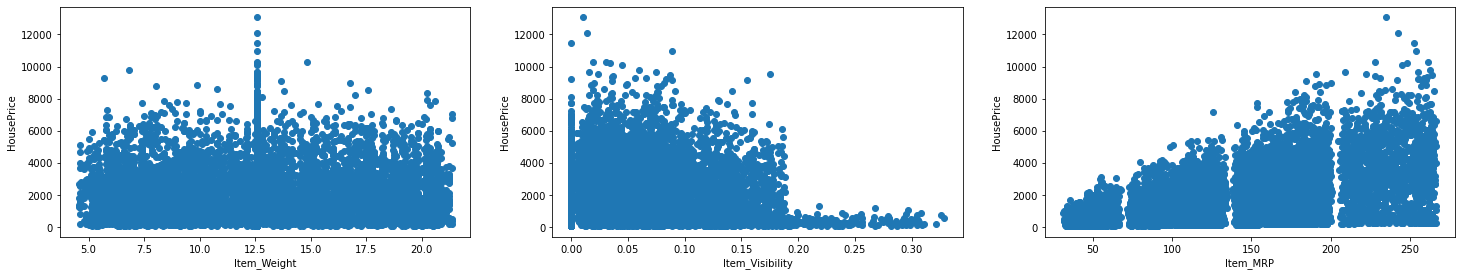

In [960]:
j=0
plt.figure(figsize=(25,50))
for column in continuescols:
    plt.subplot(10,3,j+1)
    plt.scatter(train[column],train["Item_Outlet_Sales"])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j=j+1

In [961]:
observationval = train.groupby('Outlet_Establishment_Year')["Item_Outlet_Sales"].mean()
observationval

Outlet_Establishment_Year
1985    2483.677474
1987    2298.995256
1997    2277.844267
1998     339.351662
1999    2348.354635
2002    2192.384798
2004    2438.841866
2007    2340.675263
2009    1995.498739
Name: Item_Outlet_Sales, dtype: float64

In [962]:
observationvalDF=pd.DataFrame(observationval).sort_values(by= "Item_Outlet_Sales",ascending=False)
observationvalDF.reset_index(inplace=True)
observationvalDF

,Outlet_Establishment_Year,Item_Outlet_Sales
0,1985,2483.677474
1,2004,2438.841866
2,1999,2348.354635
3,2007,2340.675263
4,1987,2298.995256
5,1997,2277.844267
6,2002,2192.384798
7,2009,1995.498739
8,1998,339.351662


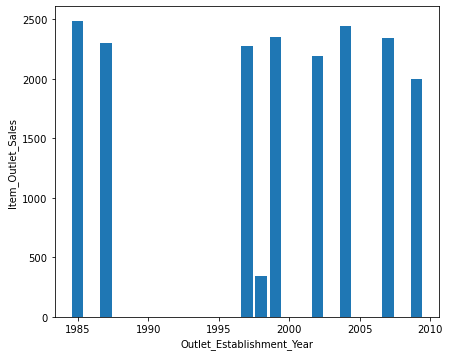

In [963]:
j=0
plt.figure(figsize=(40,40))
for column in discriatecols:
    plt.subplot(6,5,j+1)
    observationval=train.groupby(column)["Item_Outlet_Sales"].mean()
    observationvalDF=pd.DataFrame(observationval).sort_values(by= "Item_Outlet_Sales",ascending=False)
    observationvalDF.reset_index(inplace=True)
    plt.bar(observationvalDF[column],observationvalDF["Item_Outlet_Sales"])
    plt.xlabel(column)
    plt.ylabel("Item_Outlet_Sales")

In [964]:
object_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

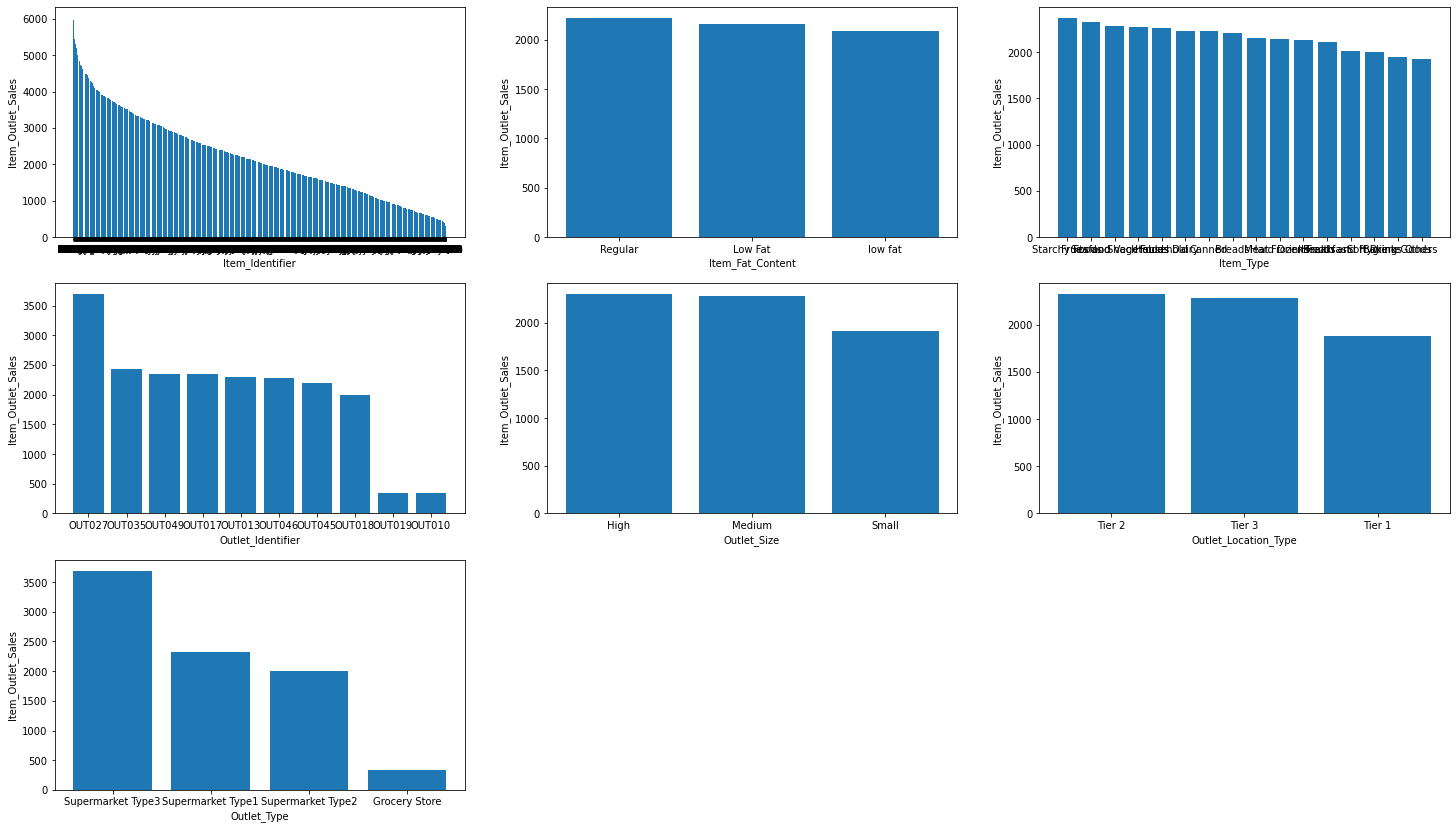

In [965]:
j=0
plt.figure(figsize=(25,50))
for column in object_columns:
    plt.subplot(10,3,j+1)
    observationval=train.groupby(column)["Item_Outlet_Sales"].mean()
    observationvalDF=pd.DataFrame(observationval).sort_values(by= "Item_Outlet_Sales",ascending=False)
    observationvalDF.reset_index(inplace=True)
    plt.bar(observationvalDF[column],observationvalDF["Item_Outlet_Sales"])
    plt.xlabel(column)
    plt.ylabel("Item_Outlet_Sales")
    j=j+1

In [966]:
train["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat'], dtype=object)

In [967]:
continuescols

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [968]:
train["Item_Visibility"].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [969]:
upper_limit=train['Item_Visibility'].mean()+3*train['Item_Visibility'].std()
lower_limit=train['Item_Visibility'].mean()-3*train['Item_Visibility'].std()
upper_limit

0.22092549574235687

In [970]:
lower_limit

-0.08866143818445432

In [971]:
for column in continuescols:
    upper_limit=train[column].mean()+3*train[column].std()
    lower_limit=train[column].mean()-3*train[column].std()   
    train.loc[(train[column]>upper_limit),column]=upper_limit
    train.loc[(train[column]<lower_limit),column]=lower_limit

In [972]:
train[(train["Item_MRP"]<=upper_limit) & (train["Item_MRP"] >=lower_limit)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [973]:
train.shape

(8523, 12)

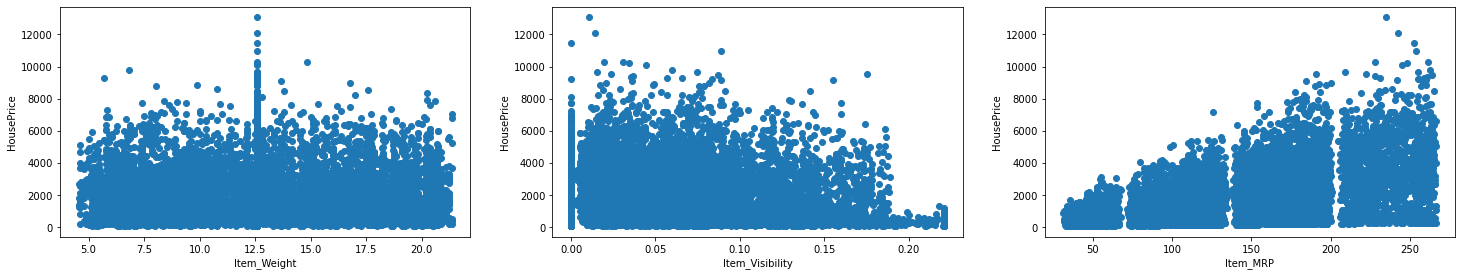

In [974]:
j=0
plt.figure(figsize=(25,50))
for column in continuescols:
    plt.subplot(10,3,j+1)
    plt.scatter(train[column],train["Item_Outlet_Sales"])
    plt.xlabel(column)
    plt.ylabel("HousePrice")
    j=j+1

#### Label encoding

In [975]:
object_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [976]:
train["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [977]:
Item_Identifier =  LabelEncoder()
c = Item_Identifier.fit_transform(train["Item_Type"])
pd.DataFrame(c)

,0
0,4
1,14
2,10
3,6
4,9
...,...
8518,13
8519,0
8520,8
8521,13


In [978]:
train_object = train[object_columns] 
train_object

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


### Label encoding for all object columns

In [979]:
from collections import defaultdict
defaultEncoder = defaultdict(LabelEncoder)  
fitobj=train_object.apply(lambda x : defaultEncoder[x.name].fit_transform(x))

In [980]:
fitobj

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,0,4,9,1,0,1
1,8,1,14,3,1,2,2
2,662,0,10,9,1,0,1
3,1121,1,6,0,1,2,0
4,1297,0,9,1,0,2,1
...,...,...,...,...,...,...,...
8518,370,0,13,1,0,2,1
8519,897,1,0,7,1,1,1
8520,1357,0,8,6,2,1,1
8521,681,1,13,3,1,2,2


In [981]:
defaultEncoder['Item_Fat_Content'].transform(["Regular"])   #checking whether transform is correct or not

array([1])

In [982]:
train.drop(object_columns,axis=1,inplace=True)

In [983]:
train.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700


In [984]:
updatedTrain.groupby(["Item_Outlet_Sales","Item_MRP"]).max()

Item_Weight  Item_Visibility  \
Item_Outlet_Sales Item_MRP                                 
33.2900           32.8900         9.500         0.000000   
                  33.3900         9.105         0.064411   
33.9558           35.0558        12.600         0.134328   
34.6216           34.3216        12.600         0.073077   
35.2874           33.8874         7.155         0.220925   
...                                 ...              ...   
10306.5840        228.0352       12.600         0.030693   
10993.6896        254.2672       12.600         0.088840   
11445.1020        253.0356       12.600         0.000000   
12117.5600        242.6512       12.600         0.014296   
13086.9648        234.9958       12.600         0.010551   

                            Outlet_Establishment_Year  Item_Identifier  \
Item_Outlet_Sales Item_MRP                                               
33.2900           32.8900                        1998              104   
                  33.3900                        1998             1474   
33.9558           35.0558                        1985              983   
34.6216           34.3216                        1985             1384   
35.2874           33.8874                        1998              809   
...                                               ...              ...   
10306.5840        228.0352                       1985              500   
10993.6896        254.2672                       1985              756   
11445.1020        253.0356                       1985             1230   
12117.5600        242.6512                       1985              788   
13086.9648        234.9958                       1985             1310   

                            Item_Fat_Content  Item_Type  Outlet_Identifier  \
Item_Outlet_Sales Item_MRP                                                   
33.2900           32.8900                  0         14                  0   
                  33.3900                  0          9                  0   
33.9558           35.0558                  1         13                  4   
34.6216           34.3216                  0          8                  4   
35.2874           33.8874                  1          1                  0   
...                                      ...        ...                ...   
10306.5840        228.0352                 1          3                  5   
10993.6896        254.2672                 0         13                  5   
11445.1020        253.0356                 0          6                  5   
12117.5600        242.6512                 1          6                  5   
13086.9648        234.9958                 0          9                  5   

                            Outlet_Size  Outlet_Location_Type  Outlet_Type  
Item_Outlet_Sales Item_MRP                                                  
33.2900           32.8900             1                     2            0  
                  33.3900             1                     2            0  
33.9558           35.0558             2                     0            0  
34.6216           34.3216             2                     0            0  
35.2874           33.8874             1                     2            0  
...                                 ...                   ...          ...  
10306.5840        228.0352            1                     2            3  
10993.6896        254.2672            1                     2            3  
11445.1020        253.0356            1                     2            3  
12117.5600        242.6512            1                     2            3  
13086.9648        234.9958            1                     2            3  

[8426 rows x 10 columns]

In [985]:
updatedTrain=pd.concat([train,fitobj],axis=1)
updatedTrain.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0.016047,249.8092,1999,3735.1380,156,0,4,9,1,0,1
1,5.92,0.019278,48.2692,2009,443.4228,8,1,14,3,1,2,2
2,17.50,0.016760,141.6180,1999,2097.2700,662,0,10,9,1,0,1
3,19.20,0.000000,182.0950,1998,732.3800,1121,1,6,0,1,2,0
4,8.93,0.000000,53.8614,1987,994.7052,1297,0,9,1,0,2,1


In [986]:
updatedTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Establishment_Year  8523 non-null   int64  
 4   Item_Outlet_Sales          8523 non-null   float64
 5   Item_Identifier            8523 non-null   int32  
 6   Item_Fat_Content           8523 non-null   int32  
 7   Item_Type                  8523 non-null   int32  
 8   Outlet_Identifier          8523 non-null   int32  
 9   Outlet_Size                8523 non-null   int32  
 10  Outlet_Location_Type       8523 non-null   int32  
 11  Outlet_Type                8523 non-null   int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 566.1 KB


In [987]:
corr_train = updatedTrain.corr()
corr_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Weight,1.000000,-0.014326,0.024951,0.007739,0.009693,0.044218,-0.022625,0.028038,-0.007666,-0.010536,0.001958,-0.009973
Item_Visibility,-0.014326,1.000000,-0.001102,-0.068569,-0.123068,-0.026749,0.044218,-0.035858,-0.096297,0.064720,-0.025130,-0.165138
Item_MRP,0.024951,-0.001102,1.000000,0.005020,0.567574,0.012853,0.000363,0.032651,0.003319,0.006059,0.000232,-0.001975
Outlet_Establishment_Year,0.007739,-0.068569,0.005020,1.000000,-0.049135,-0.012772,-0.009013,0.004970,0.079035,0.193389,-0.089216,-0.122304
Item_Outlet_Sales,0.009693,-0.123068,0.567574,-0.049135,1.000000,0.002869,0.014669,0.017048,0.162325,-0.086182,0.089367,0.401522
Item_Identifier,0.044218,-0.026749,0.012853,-0.012772,0.002869,1.000000,-0.106159,-0.017973,-0.008602,0.001389,0.003656,-0.001178
Item_Fat_Content,-0.022625,0.044218,0.000363,-0.009013,0.014669,-0.106159,1.000000,-0.130401,-0.005738,-0.006797,0.000967,0.001169
Item_Type,0.028038,-0.035858,0.032651,0.004970,0.017048,-0.017973,-0.130401,1.000000,0.001656,-0.001859,0.003084,0.003053
Outlet_Identifier,-0.007666,-0.096297,0.003319,0.079035,0.162325,-0.008602,-0.005738,0.001656,1.000000,0.504603,-0.716176,0.099873
Outlet_Size,-0.010536,0.064720,0.006059,0.193389,-0.086182,0.001389,-0.006797,-0.001859,0.504603,1.000000,-0.614311,-0.201483


In [988]:
corr_train['Item_Outlet_Sales']

Item_Weight                  0.009693
Item_Visibility             -0.123068
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Item_Identifier              0.002869
Item_Fat_Content             0.014669
Item_Type                    0.017048
Outlet_Identifier            0.162325
Outlet_Size                 -0.086182
Outlet_Location_Type         0.089367
Outlet_Type                  0.401522
Name: Item_Outlet_Sales, dtype: float64

In [989]:
corrColumns=abs(corr_train['Item_Outlet_Sales']).sort_values(ascending=False)
corrColumns

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Outlet_Type                  0.401522
Outlet_Identifier            0.162325
Item_Visibility              0.123068
Outlet_Location_Type         0.089367
Outlet_Size                  0.086182
Outlet_Establishment_Year    0.049135
Item_Type                    0.017048
Item_Fat_Content             0.014669
Item_Weight                  0.009693
Item_Identifier              0.002869
Name: Item_Outlet_Sales, dtype: float64

In [990]:
corrColumns[corrColumns>0.4]

Item_Outlet_Sales    1.000000
Item_MRP             0.567574
Outlet_Type          0.401522
Name: Item_Outlet_Sales, dtype: float64

In [991]:
len(corrColumns[corrColumns>0.4])

3

In [992]:

Finalcolumns=corrColumns[corrColumns>0.4].index
Finalcolumns

Index(['Item_Outlet_Sales', 'Item_MRP', 'Outlet_Type'], dtype='object')

In [993]:
finaldf=updatedTrain[Finalcolumns]
finaldf

,Item_Outlet_Sales,Item_MRP,Outlet_Type
0,3735.1380,249.8092,1
1,443.4228,48.2692,2
2,2097.2700,141.6180,1
3,732.3800,182.0950,0
4,994.7052,53.8614,1
...,...,...,...
8518,2778.3834,214.5218,1
8519,549.2850,108.1570,1
8520,1193.1136,85.1224,1
8521,1845.5976,103.1332,2


In [994]:
y = finaldf['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [995]:
X = finaldf.drop(["Item_Outlet_Sales"],axis=1)
X



,Item_MRP,Outlet_Type
0,249.8092,1
1,48.2692,2
2,141.6180,1
3,182.0950,0
4,53.8614,1
...,...,...
8518,214.5218,1
8519,108.1570,1
8520,85.1224,1
8521,103.1332,2


In [996]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=42)

In [997]:
X_train.head()

,Item_MRP,Outlet_Type
1921,116.6466,0
655,103.0332,1
2229,129.1310,3
2537,222.6088,1
3528,184.8266,1


In [998]:
X_test.head()

,Item_MRP,Outlet_Type
7503,79.4302,1
2957,42.7086,1
7031,42.0454,1
1084,173.7054,3
856,197.5110,1


In [999]:
y_train.head()

1921     117.8466
655     1230.3984
2229    4933.5780
2537    1789.6704
3528    3872.9586
Name: Item_Outlet_Sales, dtype: float64

In [1000]:
y_test.head()

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
Name: Item_Outlet_Sales, dtype: float64

In [1001]:
sc=StandardScaler()
X_train=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(sc.fit_transform(X_test),columns=X_train.columns)


In [1002]:
X_test.head()

,Item_MRP,Outlet_Type
0,-0.971400,-0.229090
1,-1.569451,-0.229090
2,-1.580252,-0.229090
3,0.563975,2.306768
4,0.951676,-0.229090


In [1003]:
lr=LinearRegression()
#train the model using training sets
lr.fit(X_train,y_train)

LinearRegression()

In [1004]:
y_pred=lr.predict(X_test)
pd.DataFrame(y_pred)

,0
0,1087.213481
1,495.952840
2,485.274546
3,4346.345277
4,2988.452247
...,...
2552,1748.684874
2553,2784.176732
2554,2028.324599
2555,1880.505134


In [1005]:
y_test

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
          ...    
443     2133.2232
777     4287.7520
1119     767.0016
3209     642.4970
3742    2570.6538
Name: Item_Outlet_Sales, Length: 2557, dtype: float64

In [1006]:
lr.score(X_train,y_train)

0.4802982349179312

In [1007]:
lr.score(X_test,y_test) 

0.4901103332551986